Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python
Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python

Shape: (200, 5)

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


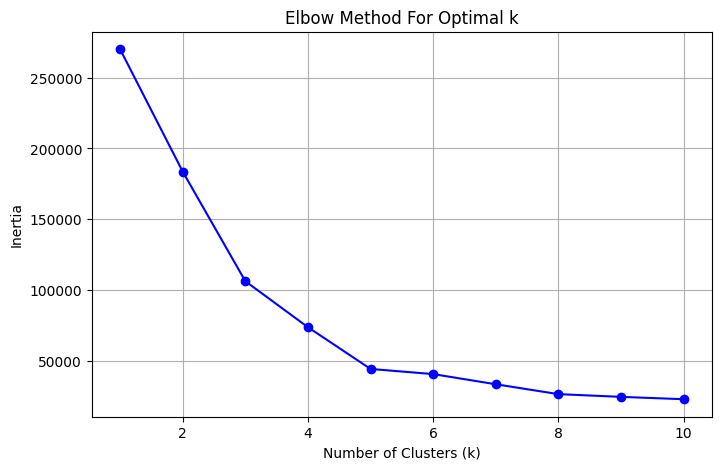

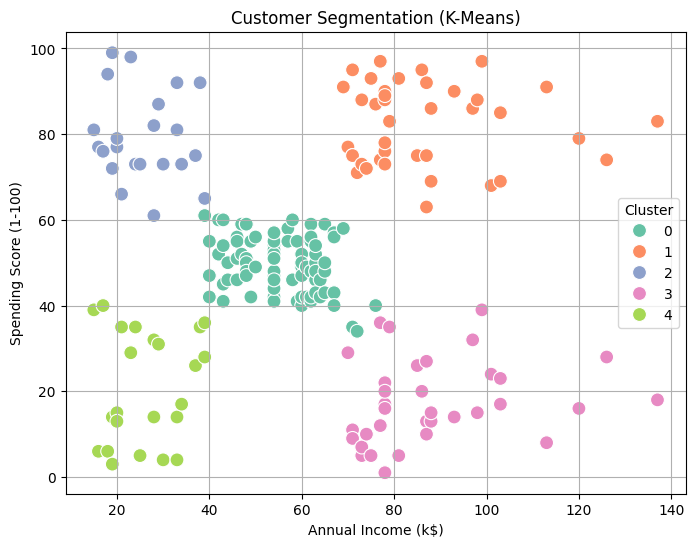


Cluster Summary:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)
# Customer Segmentation using K-Means Clustering and kagglehub

# Step 1: Install kagglehub if not already
!pip install kagglehub --quiet

# Step 2: Import Libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 3: Download Dataset from KaggleHub
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")
print("Path to dataset files:", path)

# Step 4: Load Dataset
data_path = f"{path}/Mall_Customers.csv"
df = pd.read_csv(data_path)
df.head()

# Step 5: Data Cleaning
print("\nShape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Step 6: Feature Selection (Annual Income, Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 7: Elbow Method to Find Optimal k
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Step 8: Apply KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Step 9: Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', palette='Set2', data=df, s=100
)
plt.title('Customer Segmentation (K-Means)')
plt.grid(True)
plt.show()

# Step 10: Cluster Summary
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Summary:\n", cluster_summary)
